In [1]:
import sys
#sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/Lya_commands')
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/data analysis 2024/LyA/commands')

from Ltif import Lpicday, Lpic
from sklearn import datasets, metrics, svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import dump, load

In [2]:
df = Lpicday('24_04_23').clusters_data().iloc[[2,3]]
#cl = [val for val in list(df['cluster']) if len(val) > 0]
cl = [val for bal in list(df['cluster']) for val in bal if len(val) > 0]

The clusters datafile for the date 24_04_23 already exists.


In [54]:
len(cl)

337

In [34]:
len(cl)

165

In [61]:
len(cl)

502

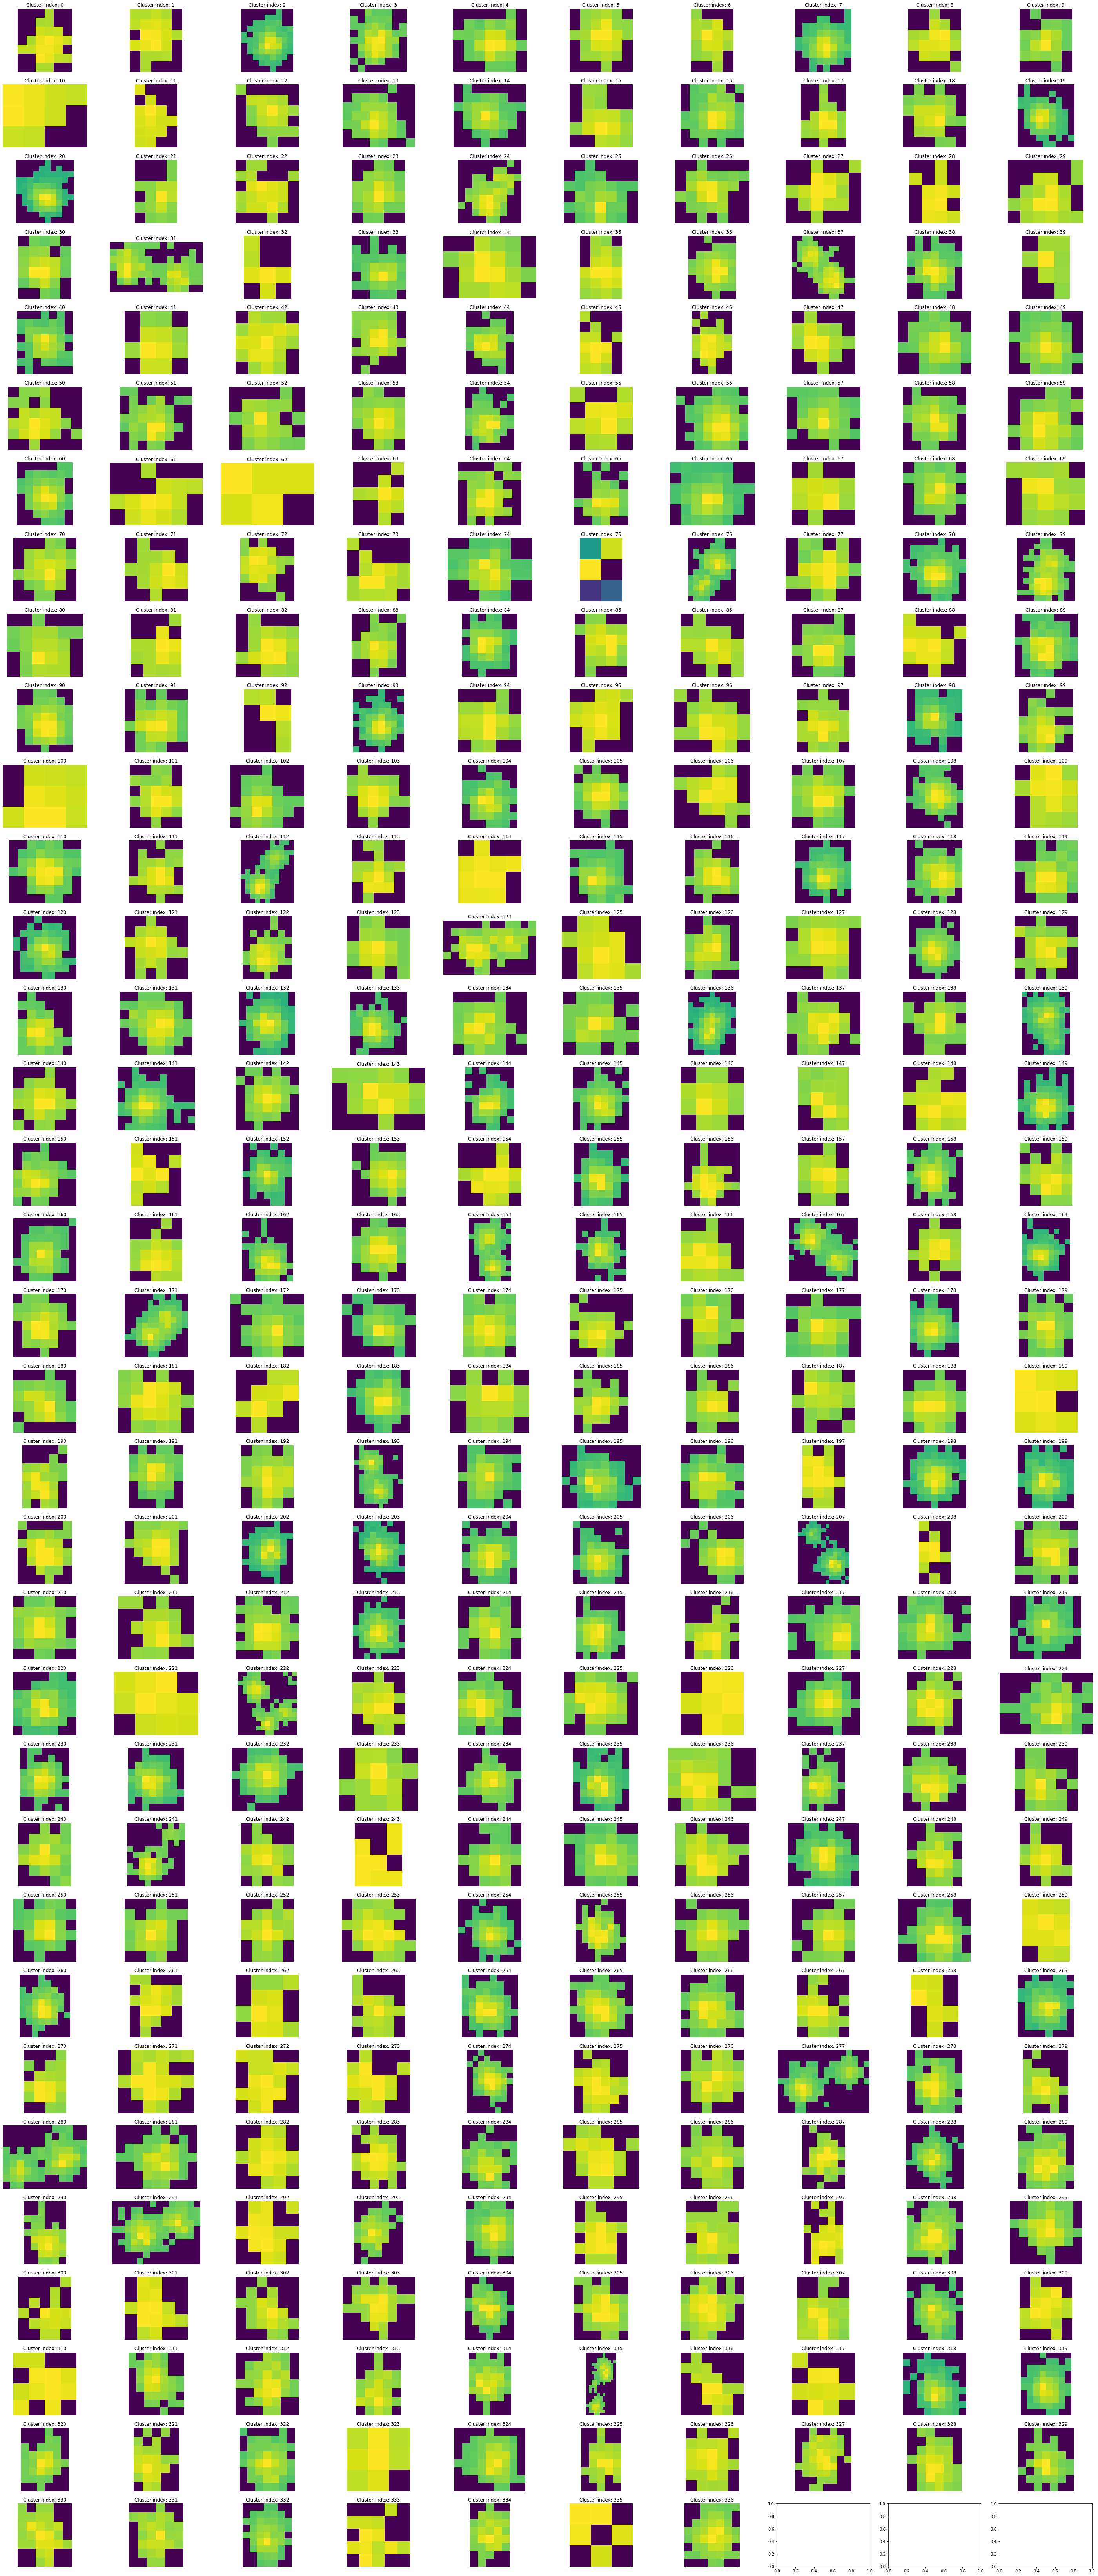

In [55]:
rows, cols = 34, 10

_, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (50,120))


for i in range(rows):
    for ax, image, label in zip(axes[i], cl[cols * i:], list(range(0,len(cl)))[cols * i:]):
        ax.set_axis_off()
        ax.imshow(image, interpolation = 'nearest')
        ax.set_title('Cluster index: %i' % label)

In [2]:
target = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1, #file 1 ('/eos/experiment/gbar/pgunpc/data/24_04_23/PCO-SwY_exp_10_us_1713862660.516.tif')
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,2,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,
                  2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])#file 2 ('/eos/experiment/gbar/pgunpc/data/24_04_23/PCO-SwY_exp_10_us_1713862674.765.tif')

print(np.argmax(target))
target = [val if val < 3 else 2 for val in target]

47


In [3]:
len([val for val in target if val>1])

17

In [4]:
max_h, max_w = 53, 42

for item in [val for bal in cl for val in bal]:
    while len(item) < max_w:
        item += [0]

for item in cl:
    while len(item) < max_h:
        item += [[0] * max_w]
        
ac = np.array(cl)

data = ac.reshape(len(cl), -1)

In [19]:
clf = load('/eos/user/l/lkoller/ML models/clust_num_v7.txt')

In [20]:
predicted = clf.predict(data)

In [21]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(target, predicted)}\n"
)

Classification report for classifier SVC(probability=True):
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       485
           2       1.00      0.41      0.58        17

    accuracy                           0.98       502
   macro avg       0.99      0.71      0.79       502
weighted avg       0.98      0.98      0.98       502




In [22]:
ind = [val[0] for val in list(enumerate(predicted == target)) if val[1] == False]
len(ind), clf.score(data,target)

(10, 0.9800796812749004)

In [23]:
list(enumerate(clf.predict_proba(data[ind])))

[(0, array([0.23391566, 0.76608434])),
 (1, array([0.94003343, 0.05996657])),
 (2, array([0.77964821, 0.22035179])),
 (3, array([0.54224937, 0.45775063])),
 (4, array([0.90011156, 0.09988844])),
 (5, array([0.45237526, 0.54762474])),
 (6, array([0.98885169, 0.01114831])),
 (7, array([0.90998271, 0.09001729])),
 (8, array([0.88494227, 0.11505773])),
 (9, array([0.41291781, 0.58708219]))]

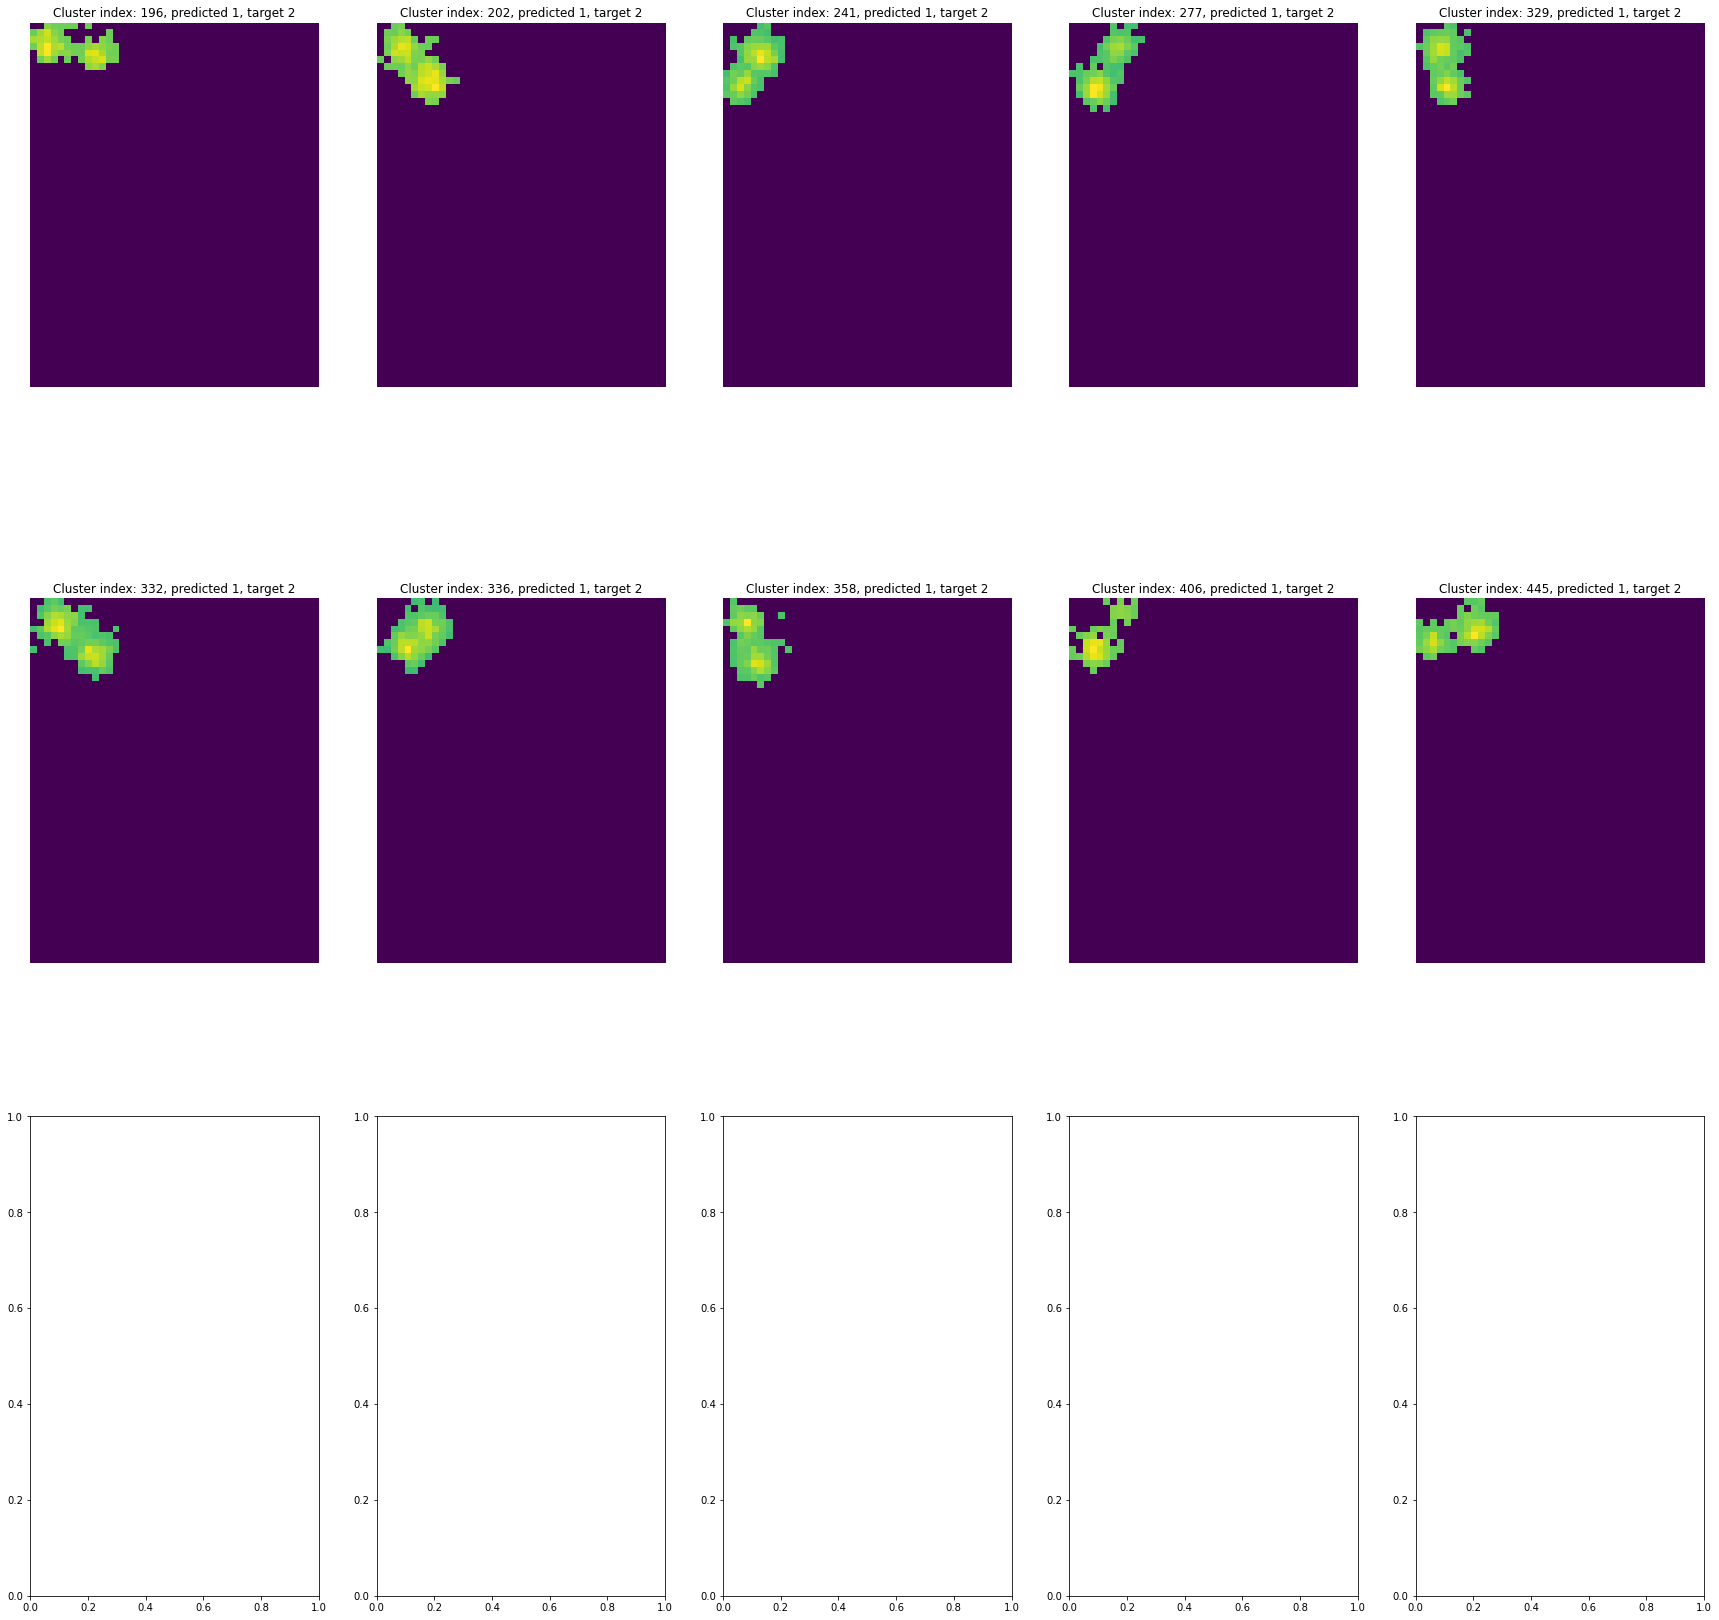

In [24]:
_, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30,30))

for i in range(3):
    for ax, image, label in zip(axes[i], ac[ind][5 * i:], ind[5 * i:]):
        ax.set_axis_off()
        ax.imshow(image, interpolation = 'nearest')
        ax.set_title('Cluster index: %i, predicted %i, target %i' % (label,predicted[label],target[label]))


predicted 1
actual 2
[-0.82296841]


297

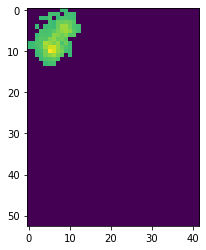

In [101]:
i = ind[17]

print('predicted %i' % predicted[i])
print('actual %i' % target[i])
print(clf.decision_function([data[i]]))
plt.imshow(cl[i])

ind[15]

In [102]:
target[307]

1

In [88]:
clf.decision_function(data)

array([-1.27389403, -0.8371217 , -1.31266353, -1.18027847, -1.25240342,
       -0.94820927, -0.93540775,  1.08787886, -1.02317502, -1.26585387,
       -1.46803454, -1.22490814, -1.09378148,  1.0158444 , -1.20954386,
       -1.27975946, -1.29670861, -1.20542863, -1.16268575, -1.26054814,
       -1.28658723, -1.1714736 , -1.24210911, -1.07295006, -1.22045253,
       -1.18649574, -1.27500001, -1.37659779,  0.60235748, -1.13432924,
       -1.24973301, -1.32017958,  0.94861693, -1.14140077, -1.44876154,
       -1.36335108, -1.11591004,  1.15650581,  1.44138622,  1.76630314,
       -0.81905751,  1.36626681, -1.32782625,  1.10933691, -1.35832416,
       -0.97057292, -1.3344266 , -1.20730395, -1.03525965, -0.49556301,
       -1.2430175 , -1.21356175, -0.8532254 , -1.45725992, -1.47230467,
       -0.88325078, -0.49638132, -0.55368931, -1.21806248, -1.19452365,
       -1.33296672, -1.203386  , -1.1102212 , -1.03089752, -1.10546176,
       -0.46165532, -1.50752627,  1.39713143, -1.20864426, -1.10